In [1]:
import pandas as pd
import os
import glob
import missingno as msno
import matplotlib.pyplot as plt


In [2]:
#def calculating_null_values_per_column(data: pd.DataFrame, label: str) -> dict:
#    """
#    Calculates the number of null values per column in a dataframe and presents the result as a dictionary
#    """
#    null_values_dict = {}

#    for i in data.columns:
#        null_values_dict[i] = data[i].isna().sum()

#    print(f'The number of null values per column in the {label} is the following: ' + str(null_values_dict))
    
#    return null_values_dict

In [3]:
# Moving csv files to their own folder

if os.path.exists("./data/csv/"):
    pass
else:
    source_folder = "./"

    destination_folder = os.path.join(source_folder, "data/csv")

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir("./csv/"):
        os.rename(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

In [4]:
csv_files = os.listdir("./data/original/")
print(csv_files)

['holidays_events.csv', 'oil.csv', 'sample_submission.csv', 'stores.csv', 'test.csv', 'train.csv', 'transactions.csv']


In [5]:
dict_of_csvs = {}

for i in csv_files:
    dict_of_csvs[i[:-4]] = pd.read_csv("./data/original/" + i)

In [6]:
print(csv_files)

['holidays_events.csv', 'oil.csv', 'sample_submission.csv', 'stores.csv', 'test.csv', 'train.csv', 'transactions.csv']


In [7]:
list(dict_of_csvs.keys())

['holidays_events',
 'oil',
 'sample_submission',
 'stores',
 'test',
 'train',
 'transactions']

In [8]:
dict_of_csvs['holidays_events'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [9]:
dict_of_csvs['holidays_events'].head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [10]:
dict_of_csvs['oil'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [11]:
dict_of_csvs['oil'].head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [22]:
dict_of_csvs['stores'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [23]:
dict_of_csvs['stores'].head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [26]:
dict_of_csvs['transactions'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [27]:
dict_of_csvs['transactions'].head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
train_data = pd.read_csv('./data/original/train.csv')
train_data.drop(train_data.columns[0], axis=1, inplace=True)
train_data.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [13]:
train_data.describe()

,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


In [16]:
train_data.shape

(3000888, 5)

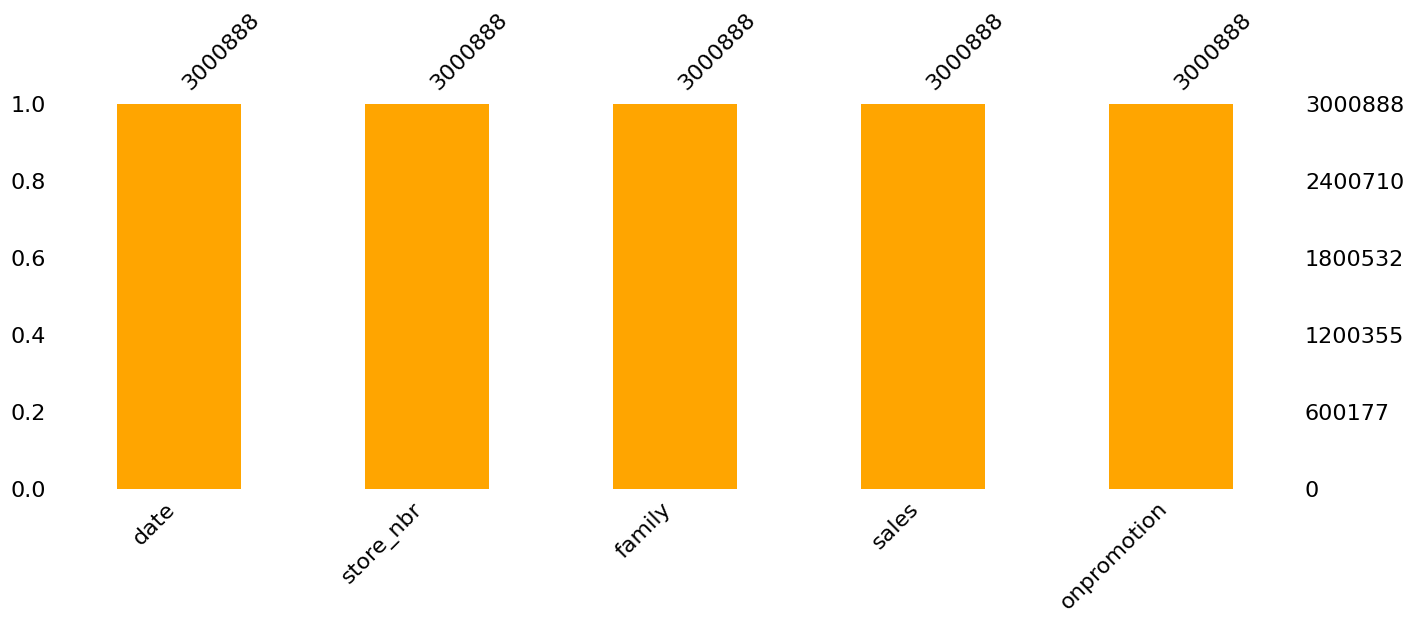

In [14]:
# Let´s analyze the gaps in the training data
msno.bar(train_data, figsize = (16,5),color = "orange")
plt.show()

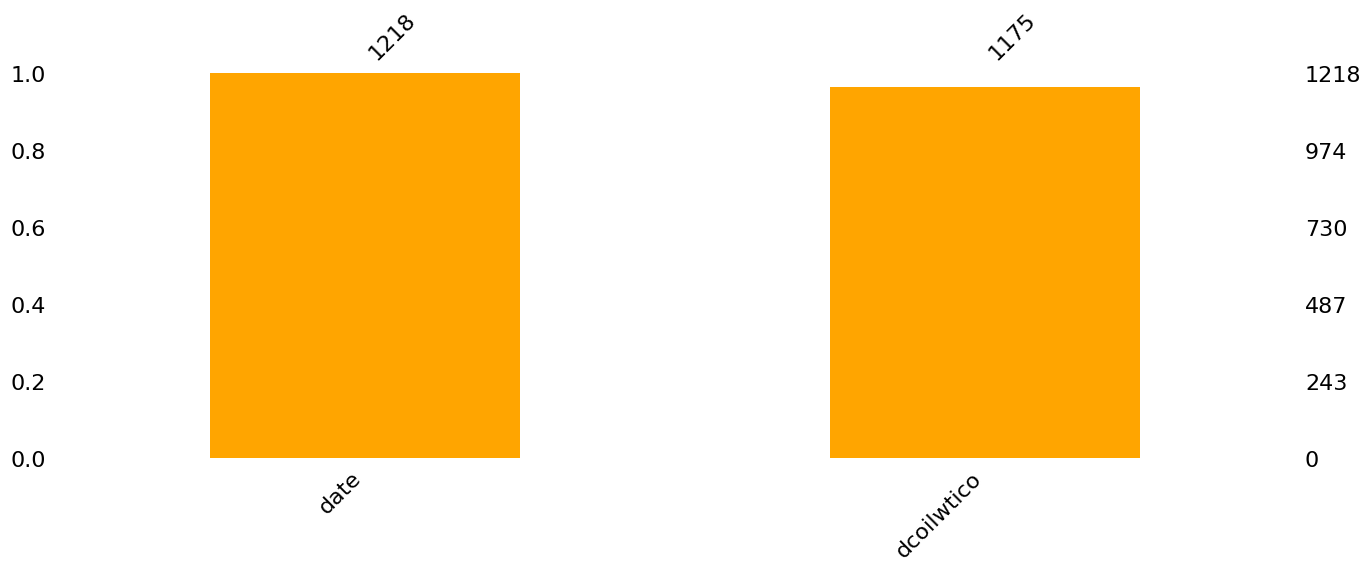

In [17]:
# Let's analyze the gaps in the oil data
msno.bar(dict_of_csvs['oil'], figsize = (16,5),color = "orange")
plt.show()

In [18]:
dict_of_csvs['oil'].shape

(1218, 2)

In [19]:
dict_of_csvs['holidays_events'].shape

(350, 6)

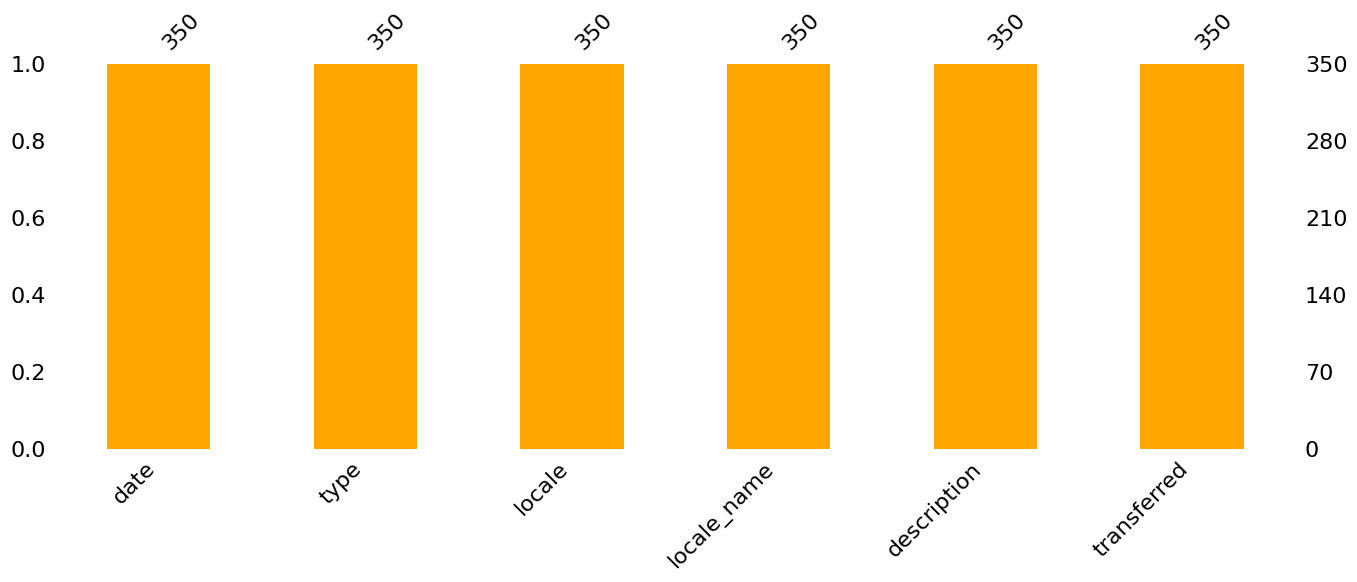

In [21]:
# Let´s analyze the gaps in the holidays data.
msno.bar(dict_of_csvs['holidays_events'], figsize = (16,5),color = "orange")
plt.show()

In [24]:
dict_of_csvs['stores'].shape

(54, 5)

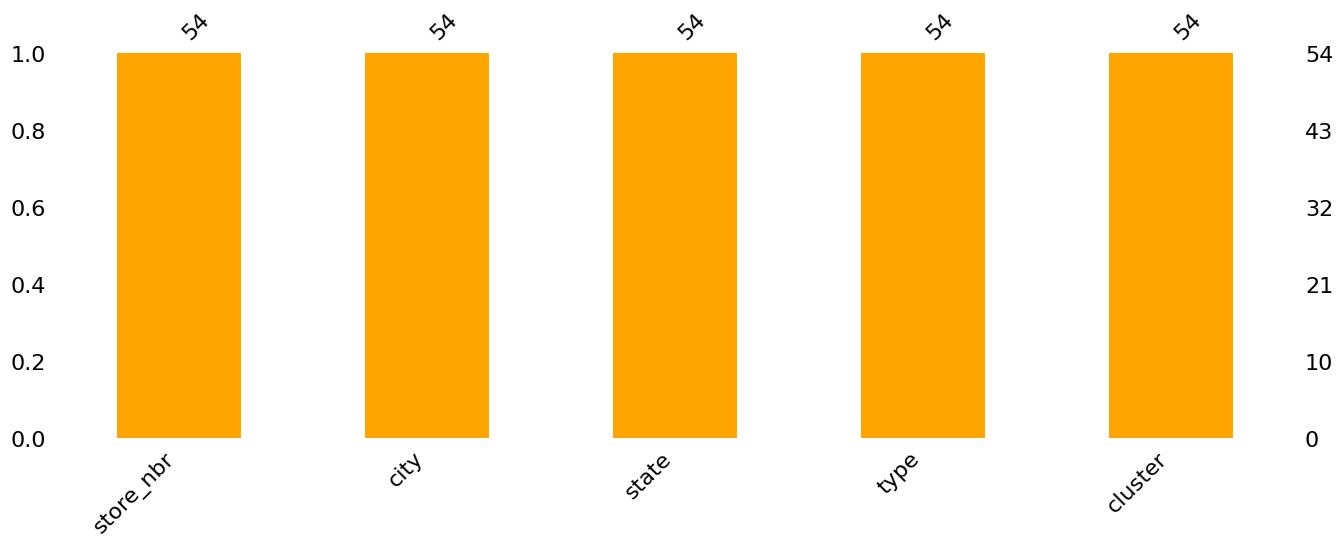

In [25]:
# Let´s analyze the gaps in the stores data.
msno.bar(dict_of_csvs['stores'], figsize = (16,5),color = "orange")
plt.show()

In [28]:
dict_of_csvs['transactions'].shape

(83488, 3)

In [ ]:
# Let´s analyze the gaps in the transactions data.
msno.bar(dict_of_csvs['transactions'], figsize = (16,5),color = "orange")
plt.show()